In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Data

df = pd.read_csv('instagram_reach.csv', index_col = 1)
df.head()

,Unnamed: 0,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
S.No,,,,,,,
1,0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
2,1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
3,2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
4,3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
5,4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [3]:
# Feature Selection

df1 = df[['Followers','Time since posted','Likes']]
df1.head()

,Followers,Time since posted,Likes
S.No,,,
1,1600,11 hours,139
2,880,2 hours,23
3,255,2 hours,25
4,340,3 hours,49
5,304,3 hours,30


In [4]:
# Structure of Data

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 25
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Followers          100 non-null    int64 
 1   Time since posted  100 non-null    object
 2   Likes              100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ KB


In [5]:
# Descriptive Statistics

df1.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [6]:
# Extracting the Numeric part of Time since posted variable

df1['Time_since_posted'] = df1['Time since posted'].map(lambda x: x.rstrip('hours'))
df1.head()

,Followers,Time since posted,Likes,Time_since_posted
S.No,,,,
1,1600,11 hours,139,11
2,880,2 hours,23,2
3,255,2 hours,25,2
4,340,3 hours,49,3
5,304,3 hours,30,3


In [7]:
# Converting the new variable to Integer
df1['Time_since_posted'] = df1['Time_since_posted'].astype('int')

# Rearranging the Columns
df1 = df1[['Followers','Time_since_posted','Likes']]

# Structure of New Data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 25
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Followers          100 non-null    int64
 1   Time_since_posted  100 non-null    int32
 2   Likes              100 non-null    int64
dtypes: int32(1), int64(2)
memory usage: 2.7 KB


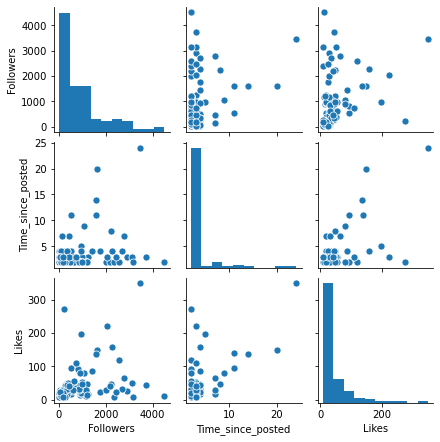

In [8]:
# Relationship of Independent variables with Dependent variables

sns.pairplot(data = df1, size = 2, plot_kws = {"s": 50});

                   Followers  Time_since_posted
Followers           1.000000           0.251154
Time_since_posted   0.251154           1.000000


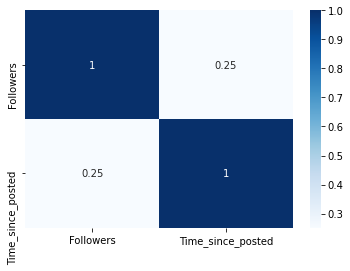

In [9]:
# Checking for multi-collinearity

print(df1.iloc[:,:-1].corr())
sns.heatmap(df1.iloc[:,:-1].corr(), annot = True, cmap = 'Blues');

In [10]:
# Splitting Data into X & Y

X = df1.values[:,:-1]
Y = df1.values[:,-1]
Y = Y.astype('int')

In [11]:
# Splitting the X & Y further into Train & Test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [12]:
# Building Model

from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train, Y_train)
Y_pred = lr_reg.predict(X_test)

In [13]:
# Model Evaluation

from sklearn.metrics import mean_squared_error

print('MSE :',round(mean_squared_error(Y_pred, Y_test),2))

MSE : 494.06


In [14]:
# Saving the Model

from pickle import dump

filename = 'model.h5'
dump(lr_reg, open(filename, 'wb'))

In [15]:
# Loading the Model

from pickle import load

x = load(open('model.h5','rb'))

In [16]:
# Predicting for 300 followers and 10 hours of Time Since posted

y = x.predict([[300,10]])
print('for 300 followers and 10 hours of Time Since posted we get',int(round(y[0])),'likes')

for 300 followers and 10 hours of Time Since posted we get 102 likes
